# MultiClass Image Classification using keras

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fruit-images-for-object-detection/train_zip/train/banana_68.jpg
/kaggle/input/fruit-images-for-object-detection/train_zip/train/apple_46.jpg
/kaggle/input/fruit-images-for-object-detection/train_zip/train/apple_28.xml
/kaggle/input/fruit-images-for-object-detection/train_zip/train/orange_20.jpg
/kaggle/input/fruit-images-for-object-detection/train_zip/train/orange_22.xml
/kaggle/input/fruit-images-for-object-detection/train_zip/train/apple_65.xml
/kaggle/input/fruit-images-for-object-detection/train_zip/train/orange_41.xml
/kaggle/input/fruit-images-for-object-detection/train_zip/train/banana_67.xml
/kaggle/input/fruit-images-for-object-detection/train_zip/train/mixed_12.xml
/kaggle/input/fruit-images-for-object-detection/train_zip/train/banana_37.xml
/kaggle/input/fruit-images-for-object-detection/train_zip/train/mixed_1.jpg
/kaggle/input/fruit-images-for-object-detection/train_zip/train/apple_55.xml
/kaggle/input/fruit-images-for-object-detection/train_zip/train/mixed_2

## Importing modules 

In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2

from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential

from sklearn.model_selection import train_test_split

np.random.seed(1)

## Processing data

### Processing training data

In [3]:
# -> appending images in a list 'train_images'
# -> appending labels in a list 'train_labels'

train_images = []       
train_labels = []
shape = (200,200)  
train_path = '../input/fruit-images-for-object-detection/train_zip/train'

for filename in os.listdir('../input/fruit-images-for-object-detection/train_zip/train'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path,filename))
        
        # Spliting file names and storing the labels for image in list
        train_labels.append(filename.split('_')[0])
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        
        train_images.append(img)

# Converting labels into One Hot encoded sparse matrix
train_labels = pd.get_dummies(train_labels).values

# Converting train_images to array
train_images = np.array(train_images)

# Splitting Training data into train and validation dataset
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)


### Processing testing data

In [4]:
# -> appending images in a list 'test_images'
# -> appending labels in a list 'test_labels'
# The test data contains labels as well also we are appending it to a list but we are'nt going to use it while training.

test_images = []
test_labels = []
shape = (200,200)
test_path = '../input/fruit-images-for-object-detection/test_zip/test'

for filename in os.listdir('../input/fruit-images-for-object-detection/test_zip/test'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        
        # Spliting file names and storing the labels for image in list
        test_labels.append(filename.split('_')[0])
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        
        test_images.append(img)
        
# Converting test_images to array
test_images = np.array(test_images)

## Visualizing Training data

[0 1 0 0]


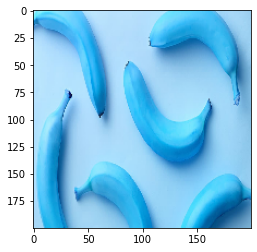

In [5]:
print(train_labels[0])
plt.imshow(train_images[0])

[1 0 0 0]


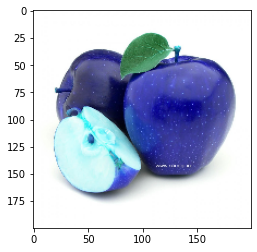

In [6]:
print(train_labels[4])
plt.imshow(train_images[4])

## Model Creation

In [7]:
# Creating a Sequential model
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3,)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(4,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

### Model Summary

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 30)      8670      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 30)        8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 30)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 30)        8130      
_________________________________________________________________
flatten (Flatten)            (None, 63480)             0

### Training the model

In [9]:
history = model.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/50
4/4 [==============================] - 16s 4s/step - loss: 2.4858 - acc: 0.2098 - val_loss: 1.3924 - val_acc: 0.4667
Epoch 2/50
4/4 [==============================] - 15s 4s/step - loss: 2.5544 - acc: 0.4529 - val_loss: 1.2342 - val_acc: 0.4667
Epoch 3/50
4/4 [==============================] - 14s 4s/step - loss: 1.2844 - acc: 0.4827 - val_loss: 1.2124 - val_acc: 0.4500
Epoch 4/50
4/4 [==============================] - 15s 4s/step - loss: 1.1877 - acc: 0.5020 - val_loss: 1.0513 - val_acc: 0.5500
Epoch 5/50
4/4 [==============================] - 14s 4s/step - loss: 1.0996 - acc: 0.4869 - val_loss: 1.1136 - val_acc: 0.5333
Epoch 6/50
4/4 [==============================] - 15s 4s/step - loss: 1.1734 - acc: 0.5300 - val_loss: 1.0466 - val_acc: 0.5333
Epoch 7/50
4/4 [==============================] - 14s 4s/step - loss: 1.1038 - acc: 0.4907 - val_loss: 1.1606 - val_acc: 0.4333
Epoch 8/50
4/4 [==============================] - 15s 4s/step - loss: 1.1800 - acc: 0.5356 - val_loss: 0

### Plotting model accuracy

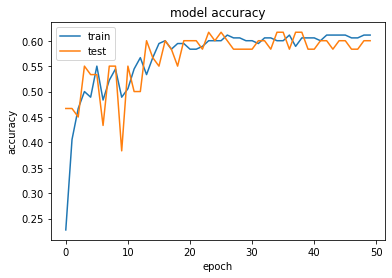

In [10]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Plotting loss

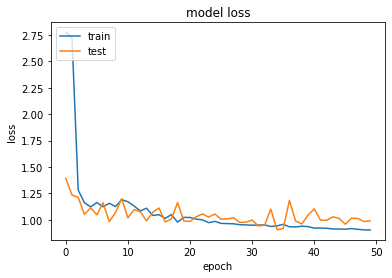

In [11]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Evaluating model on validation data

In [12]:
evaluate = model.evaluate(x_val,y_val)
print(evaluate)

2/2 [==============================] - 1s 527ms/step - loss: 0.9904 - acc: 0.6000
[0.9904381036758423, 0.6000000238418579]


### Making predictions on Test data

In [13]:
checkImage = test_images[0:1]
checklabel = test_labels[0:1]

predict = model.predict(np.array(checkImage))

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])

Actual :-  ['apple']
Predicted :-  apple


In [14]:
checkImage = test_images[3:4]
checklabel = test_labels[3:4]

predict = model.predict(np.array(checkImage))

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])

Actual :-  ['orange']
Predicted :-  orange
